# Phân tích dữ liệu về lượt truy cập và mua hàng của khách hàng trên một trang web bán quần áo nữ trực tuyến





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.express as px

In [ ]:
df = pd.read_csv("/content/E-ShopClothingEDA2008.csv")
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [ ]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [ ]:
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}

In [ ]:
df['country'] = df['country'].astype("string")
df["country"] = df["country"].map(country_map)

In [ ]:
page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
df["page 1 (main category)"] = df["page 1 (main category)"].map(page1_map)

In [ ]:
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

df["location"] = df["location"].map(location_map)

In [ ]:
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

df["colour"] = df["colour"].map(color_map)

In [ ]:
model_map = {
    1: "En face",
    2: "Profile"}

df["model photography"] = df["model photography"].map(model_map)

In [ ]:
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

df["month"] = df["month"].map(month_map)

'''df['product price status'] = df['price 2'].map({
    1: 'more than average',
    2: 'less than average'
}).astype('category')'''

"df['product price status'] = df['price 2'].map({\n    1: 'more than average',\n    2: 'less than average'\n}).astype('category')"

**Missing Data**

In [ ]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")


Great, No missing values


trùng lặp

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


Không có cột nào bị trùng lặp

In [ ]:
# Loại bỏ các cột vô dụng
df.drop('session ID', axis=1, inplace=True)

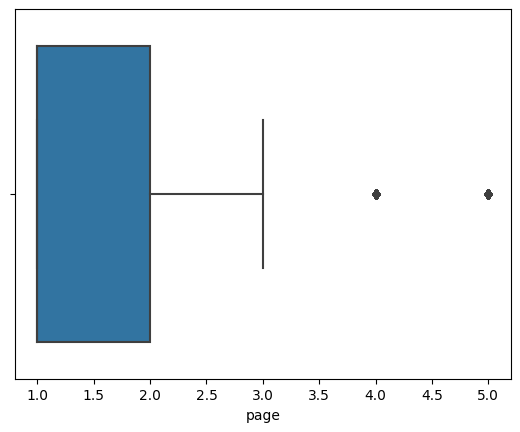

In [ ]:
# Ngoại lệ
column_list = ["page"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()


=> Sau khi kiểm tra các ngoại lệ, có vẻ như đây là dữ liệu quan trọng

EDA


In [ ]:
# Quốc gia nào có nhiều người truy cập trang web nhất?
df7 = df.groupby('country')[['price']].count()
df7 = df7.sort_values(['price'], ascending=False)
df7 = df7.query("price > 100")
fig = px.bar(df7, x=df7.index, y='price')
fig.show(renderer="colab")

Có vẻ như Ba Lan và Cộng hòa Séc là những quốc gia có nhiều du khách nhất

In [ ]:
# Linh hoạt trong việc mua sản phẩm cho từng quốc gia

df8 = df.groupby('country')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('country')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")

In [ ]:
fig = px.scatter(df8, x=df8.index, y="avreage_clicks",
                 size="avreage_clicks", color=df8.index, size_max=60)
fig.show(renderer="colab")

Các quốc gia như Romani và Estonia có tính linh hoạt cao (Thật tuyệt vời) và các quốc gia như Hy Lạp và Croatia có tính linh hoạt thấp. Tôi nghĩ có những điều ảnh hưởng đến nó như:

* Ngôn ngữ khác nhau mà họ sử dụng
* sản phẩm lạ mà họ đã tìm kiếm
* Họ chỉ duyệt (xem sản phẩm)
* Khó nhận được sản phẩm của họ (Chúng ta sẽ thảo luận vấn đề này sau)

In [ ]:
# Mối liên hệ giữa tháng và việc mua hàng từ website
df_1 = df.groupby("month")[["price"]].sum()
df_2 = df[df['month'] != 'August'].groupby("month")[["price"]].sum()
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]],subplot_titles = [
                        'With August',
                        'Without August'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show(renderer="colab")

Như chúng ta có thể thấy tháng 4 và tháng 5 là tháng bán được nhiều nhất và tháng 6 là tháng bán được thấp nhất. Dữ liệu cho tháng 8 chưa đầy đủ. nó chỉ dừng lại ở ngày thứ 13

In [ ]:
df[df['month'] == 'August']['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

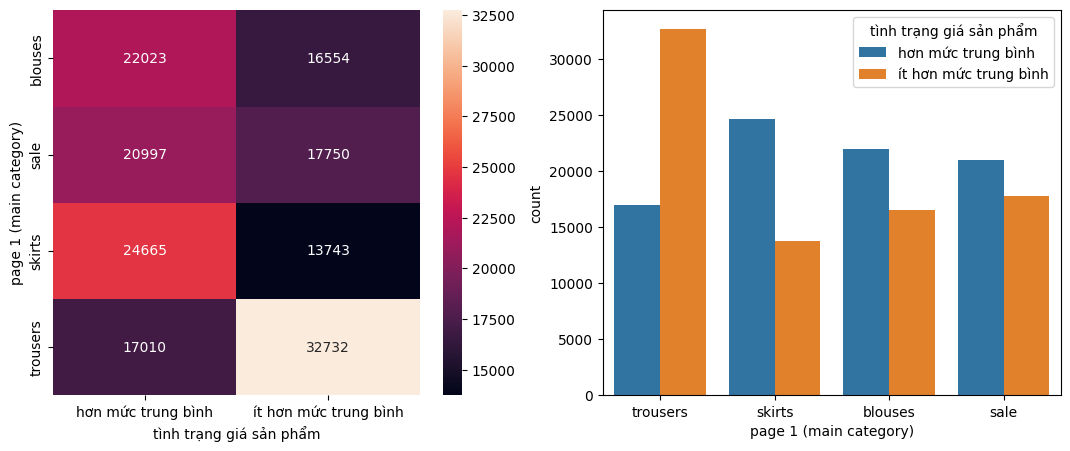

In [ ]:
# Người dùng có tìm kiếm sản phẩm rẻ hơn không?

df_copy=df.copy()
df_copy['tình trạng giá sản phẩm'] = df_copy['price 2'].map({
    1: 'hơn mức trung bình',
    2: 'ít hơn mức trung bình'
}).astype('category')

plt.figure(figsize= (13, 5))

#LEFT plot: Heatmap
plt.subplot(1, 2, 1)

# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df_copy.groupby(['page 1 (main category)', 'tình trạng giá sản phẩm']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have page 1 (main category) names class on rows
ct_counts = ct_counts.pivot(index = 'page 1 (main category)', columns = 'tình trạng giá sản phẩm', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd')

# RIGHT plot: Clustered box plot
plt.subplot(1, 2, 2)
sns.countplot(data = df_copy, x = 'page 1 (main category)', hue = 'tình trạng giá sản phẩm')
plt.show()

Ngược lại với những sản phẩm khác mà người dùng không quan tâm đến giá cả, người dùng thường tìm kiếm những chiếc quần có giá cả phải chăng hơn.

In [ ]:
# Có phải nhiều nhấp chuột vào trang web có nghĩa là lợi nhuận cao hơn? và danh mục chính có liên quan không?
df11 = df.groupby(by=["order",'page 1 (main category)'])[["price"]].sum().reset_index()
fig = px.scatter(df11, x="order", y="price",color=df11['page 1 (main category)'])
fig.show(renderer="colab")

Câu trả lời cho câu hỏi của chúng tôi là KHÔNG vì số lần nhấp chuột cao hơn 100 không bán được nhiều. Quần tây được bán nhiều nhất cho hầu hết các đơn đặt hàng, sau đó là áo cánh.

In [ ]:
# Danh mục bán chạy nhất là gì?
df_1 = df.groupby("page 1 (main category)")[["price"]].count()
df_2 = df.groupby("page 1 (main category)")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles = [
                        'Total items per Type',
                        'Total sales in dollars per Type'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show(renderer="colab")


Có vẻ như quần tây được ưa chuộng hơn nhưng danh mục của chúng tôi được phân bổ khá công bằng

In [ ]:
# Khách hàng mua gì từ mỗi trang?

import plotly.express as px

df1 = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

fig = px.bar(data_frame=df1, x="page", y="counts",
             color="page 1 (main category)", barmode="group")

fig.show(renderer="colab")


* Trang đầu tiên là trang bán chạy nhất dành riêng cho các loại quần và váy
* Có vẻ như trang cuối cùng được ưu tiên để bán sản phẩm

**Chúng ta cũng có thể kết luận rằng:**

* Ở trang 1, Quần đẹp hơn các sản phẩm khác
* Ở trang 2, Váy đẹp hơn các sản phẩm khác
* Ở trang 3, Áo tốt hơn các sản phẩm khác
* Finnaly ở trang 4 và 5, người dùng chốt doanh số

In [ ]:
# Phần nào hấp dẫn nhất trên trang và màu sắc của từng loại sản phẩm?
df2 = df.groupby(by=["location", "colour"]).size().reset_index(name="counts")
fig = px.scatter(df2, x="location", y="counts",
                 color='colour', size='counts', size_max=30)
fig.show(renderer="colab")

**Chúng ta có thể thấy điều đó:**

* Vị trí thu hút đầu tiên là phía dưới bên trái, đặc biệt dành cho **màu đen**
* Vị trí hấp dẫn thứ hai là trên cùng bên trái đặc biệt dành cho **màu xanh lam**

In [ ]:
# Sản phẩm bán có bị ảnh hưởng bởi màu sắc không?
df3 = df.groupby("colour")[["price"]].sum()
df3 = df3.sort_values(['price'], ascending=False)
fig = px.bar(data_frame=df3, x=df3.index, y="price", text_auto='.2s', color=df3.index,
             title="Colour of products with their prices")
fig.update_traces(textfont_size=12, textangle=0,
                  textposition="outside", cliponaxis=False)
fig.show(renderer="colab")

Có vẻ như việc bán sản phẩm bị ảnh hưởng bởi màu sắc và chúng ta có thể kết luận rằng:

**màu xanh** và **đen** được khách hàng ưa chuộng

In [ ]:
# Mối quan hệ giữa các quốc gia và ngày mua hàng

sum = df.groupby(by=["country", 'day'])[['price']].sum().reset_index()
sum = sum.sort_values(['price'], ascending=False)

count = df.groupby(by=["country", 'day'])[['price']].count().reset_index()
count = count.sort_values(['price'], ascending=False)

sum['avreage_prices'] = sum['price']/count['price']
sum = sum.sort_values(['avreage_prices'], ascending=False)
sum
fig = px.scatter(sum, x=sum["country"], y=sum["day"],color=sum['avreage_prices'],size=sum['avreage_prices'])
fig.show(renderer="colab")

* Đối với **Thụy Sĩ**, doanh số bán sản phẩm **rất thấp** vào đầu tháng và sau đó **tăng** trong suốt tháng
* Đối với **Ireland** và **Vương quốc Anh**, doanh số bán sản phẩm **không đổi** trong các ngày trong tháng

In [ ]:
# Nên đặt ảnh người mẫu ở mặt trước sản phẩm hay bên trong profile?

import plotly.express as px

df5 = df.groupby(by=["model photography", 'page 1 (main category)'])['price'].count().reset_index(name="counts")

fig = px.bar(data_frame=df5, x="model photography", y="counts", color="page 1 (main category)", barmode="group")

fig.show(renderer="colab")


**CÓ**, chúng ta nên đặt ảnh người mẫu lên mặt sản phẩm

In [ ]:
# Mối quan hệ giữa doanh số bán hàng, ngày mua hàng và tháng

df9 = df[df['page 1 (main category)']== "sale"]
df9 = df.groupby(by=["month","day"])['page 1 (main category)'].count().reset_index(name="counts")


fig = px.scatter(df9, y='month', x="day",
                 size="counts")
fig.show(renderer="colab")

Có vẻ như không có mối liên hệ nào giữa doanh số, ngày mua và tháng
* dữ liệu của chúng tôi chưa hoàn chỉnh vào tháng 8

In [ ]:
# Preprocessing
df_copy = pd.read_csv("/content/E-ShopClothingEDA2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)
df_copy

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,4,1,1,29,1,A13,1,5,1,28,2,1
1,4,1,2,29,1,A16,1,6,1,33,2,1
2,4,1,3,29,2,B4,10,2,1,52,1,1
3,4,1,4,29,2,B17,6,6,2,38,2,1
4,4,1,5,29,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,2,B10,2,4,1,67,1,1
165470,8,13,1,9,1,A11,3,4,1,62,1,1
165471,8,13,1,34,1,A2,3,1,1,43,2,1
165472,8,13,2,34,3,C2,12,1,1,43,1,1


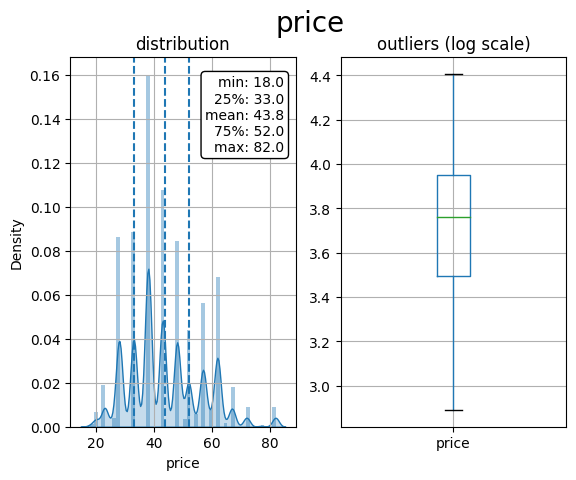

In [ ]:
x = "price"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')


sns.distplot(df_copy[x], hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df_copy[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df_copy[x])
tmp_dtf[x] = np.log(df_copy[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [ ]:
df_copy2=df_copy.drop(['price','price 2'],axis=1)

Text(0.5, 1.0, 'pearson correlation')

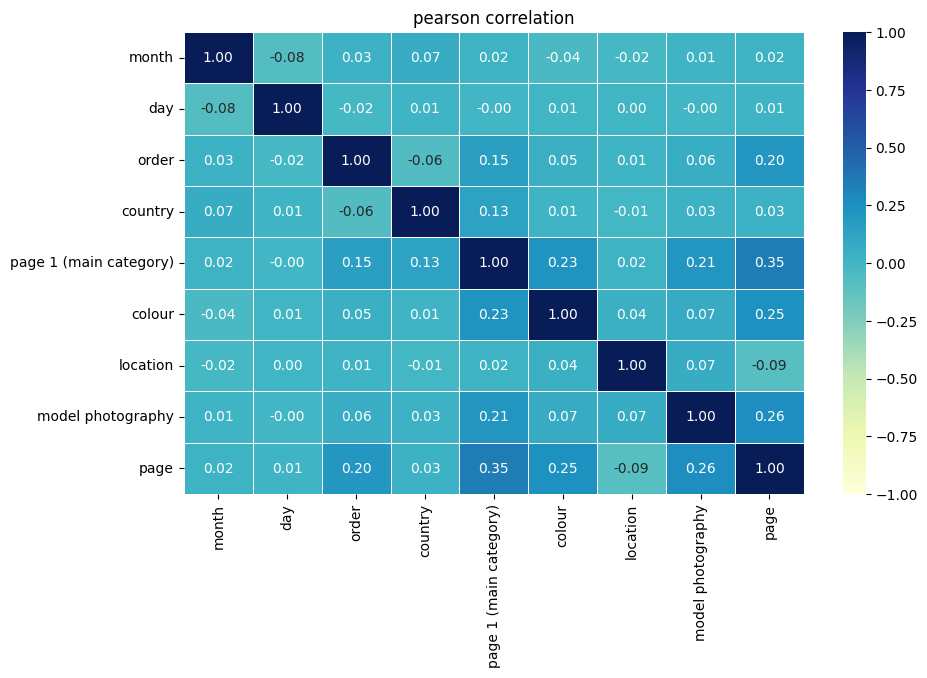

In [ ]:
plt.figure(figsize=(10,6))
corr_matrix = df_copy2.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance

#ensembling
from sklearn.ensemble import VotingClassifier

In [ ]:
# Mã hóa

df_copy = pd.read_csv("/content/E-ShopClothingEDA2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['page 2 (clothing model)']
for x in clm:
    df_copy[x]=le.fit_transform(df_copy[x])
y = df_copy["price"]
X = df_copy.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [ ]:
# Kỹ thuật tính năng
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

page 1 (main category)     0.495377
price 2                    0.440237
page 2 (clothing model)    0.332552
colour                     0.214477
location                   0.179342
page                       0.167778
model photography          0.065010
country                    0.005828
month                      0.003073
order                      0.002578
day                        0.002348
dtype: float64

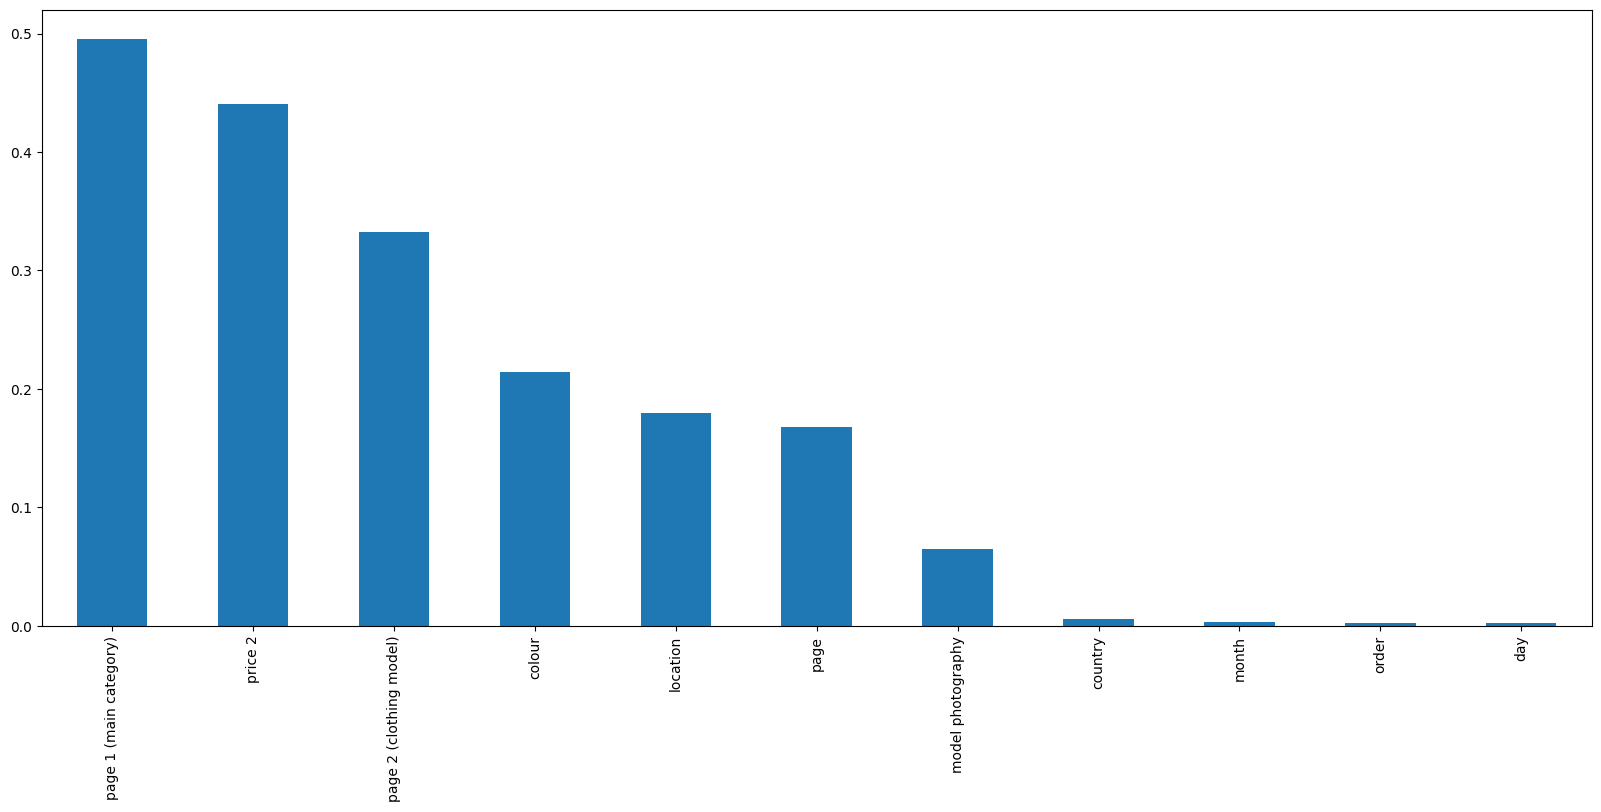

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
# Chọn 6 tính năng để làm
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'price 2', 'page'],
      dtype='object')

In [ ]:
col=['page 1 (main category)', 'page 2 (clothing model)', 'colour','location', 'price 2', 'page']
X_train=X_train[col]
X_test=X_test[col]

In [ ]:
# Chia tỷ lệ dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train (sau khi chuẩn hóa):")
print(X_train)
print("X_test (sau khi chuẩn hóa):")
print(X_test)


X_train (sau khi chuẩn hóa):
[[ 1.3963792   1.25383781 -0.99811614 -1.31922335 -0.97792656 -0.7240777 ]
 [-1.22338107 -1.39780637  0.41784544 -1.31922335  1.02257167 -0.7240777 ]
 [ 0.52312578  0.44314405 -0.52612895 -0.73593948 -0.97792656 -0.7240777 ]
 ...
 [-1.22338107 -0.84045441 -0.76212255 -0.73593948  1.02257167 -0.7240777 ]
 [ 0.52312578  0.64581749  0.65383903  1.01391215  1.02257167  1.30695897]
 [-0.35012765 -0.67155987 -0.52612895 -1.31922335 -0.97792656 -0.7240777 ]]
X_test (sau khi chuẩn hóa):
[[ 1.3963792   1.59162688  0.65383903  0.43062828  1.02257167  1.30695897]
 [-1.22338107 -1.29646965  1.83380702  1.01391215  1.02257167 -0.7240777 ]
 [ 1.3963792   1.13561164 -0.05414176 -0.73593948  1.02257167  0.29144064]
 ...
 [ 0.52312578  0.10535498  1.83380702 -1.31922335 -0.97792656  0.29144064]
 [-1.22338107 -1.33024855 -1.23410974  1.01391215  1.02257167 -0.7240777 ]
 [-1.22338107 -0.75600714 -0.76212255 -0.73593948  1.02257167 -0.7240777 ]]


**Regression models**

1. Linear regression

2. Ridge regression

3. Lasso regression

4. Random Forest Regressor

5. Gradient Boosting Regressor

In [ ]:
# 1. Linear regression
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

R2=[]
MAPE=[]
MAE=[]
RMSE=[]
acc=[]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
acc.append(lr_score)
lr_score

0.7833925668844591

In [ ]:
## test
predicted = lr.predict(X_test)

In [ ]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.78
Mean Absolute Percentage Error: 0.11
Mean Absolute Error: 4
Root Mean Squared Error : 6


* R2: 0.78, khoảng 78% phương sai của dữ liệu => mô hình khá tốt.
* MAPE (đo lường sai số tương đối của mô hình): 0.11, trung bình lỗi dự đoán của mô hình là 11% so với giá trị thực tế.
* MAE: 4 => trung bình sai số tuyệt đối của mô hình là 4 đơn vị.
* RMSE(đo lường lỗi tuyệt đối trung bình của mô hình): 6 đơn vị.

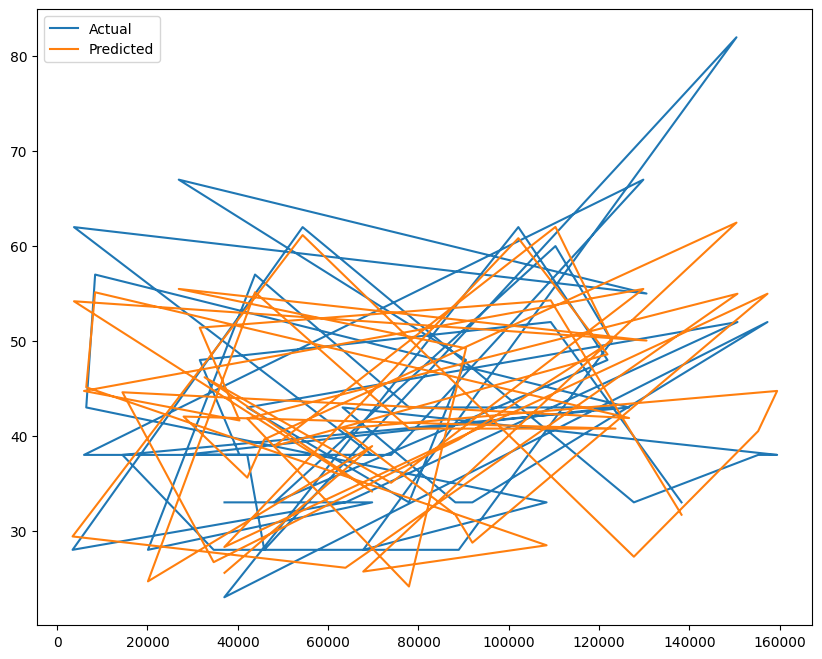

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
# 2. Ridge regression
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [ ]:
## test
predicted = ridge_model.predict(X_test)

r=ridge_model.score(X_train, y_train)
acc.append(r)
r

0.7831289374025826

In [ ]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.78
Mean Absolute Percentage Error: 0.11
Mean Absolute Error: 4
Root Mean Squared Error : 6


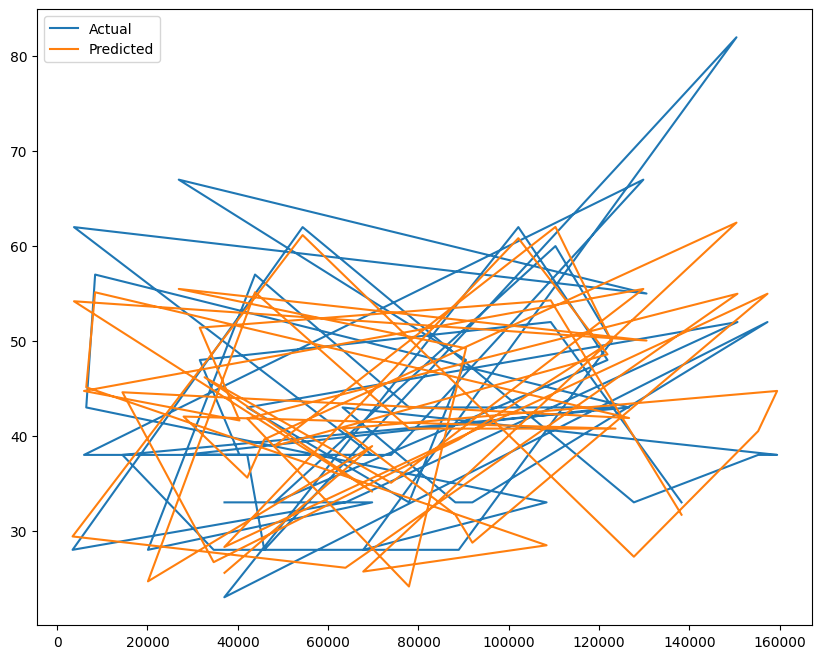

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
# 3. Lasso regression
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
lasso_cv_model = LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)
lasso_cv_model

LassoCV(cv=10, max_iter=100000)

In [ ]:
lasso_tuned = Lasso().set_params(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)
predicted = lasso_tuned.predict(X_test)
l=lasso_tuned.score(X_train, y_train)
acc.append(l)
l

0.7831031908518634

In [ ]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.78
Mean Absolute Percentage Error: 0.11
Mean Absolute Error: 4
Root Mean Squared Error : 6


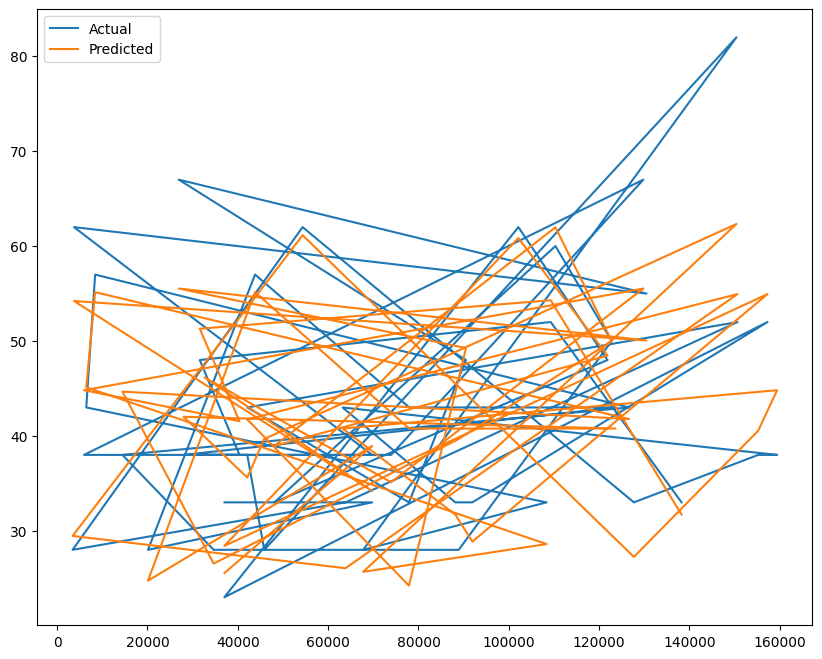

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
# 4.Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score = rfr.score(X_test,y_test)
acc.append(rfr_score)
rfr_score

0.9999999948895214

In [ ]:
predicted = rfr.predict(X_test)

In [ ]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 1.0
Mean Absolute Percentage Error: 0.0
Mean Absolute Error: 0
Root Mean Squared Error : 0


   
* R2: 1.0 => dự đoán hoàn toàn chính xác
* MAPE (đo lường sai số tương đối của mô hình): 0, không có lỗi tuyệt đối trong dự đoán. Điều này đánh giá mô hình làm dự đoán hoàn toàn chính xác.
* MAE: 0 => mô hình dự đoán chính xác giá trị thực tế.
* RMSE(đo lường lỗi tuyệt đối trung bình của mô hình): 0 => mô hình đã dự đoán một cách hoàn hảo.


Bình phương R bằng 100% có nghĩa là tất cả các biến động của giá hoàn toàn được giải thích bằng các biến động khác

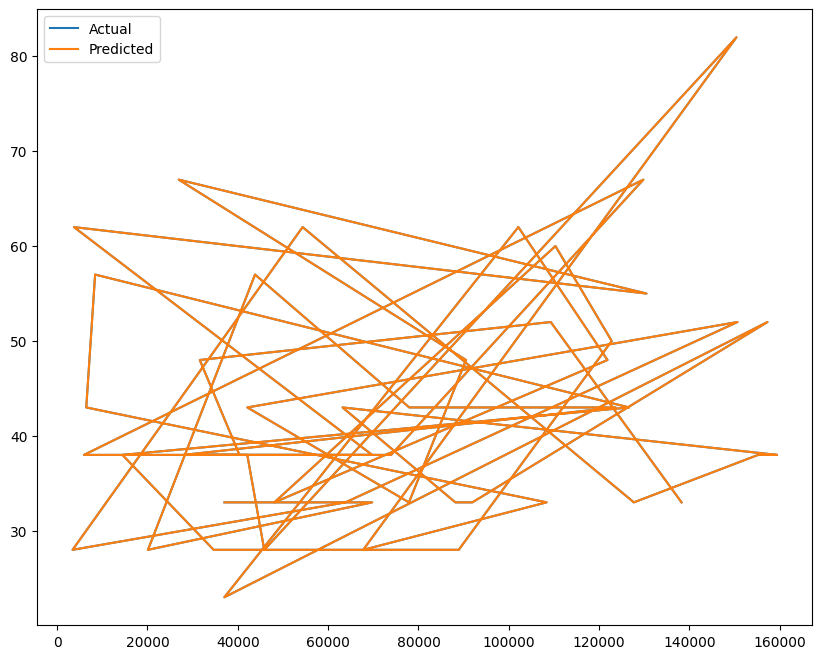

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
# 5. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33)
GBRModel.fit(X_train, y_train)
xg_score = GBRModel.score(X_test,y_test)
acc.append(xg_score)
predicted = GBRModel.predict(X_test)
xg_score

0.9937266956114691

In [ ]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Percentage Error:", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error:", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error :", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
R2.append(metrics.r2_score(y_test, predicted))
MAPE.append(np.mean(np.abs((y_test-predicted)/predicted)))
MAE.append(metrics.mean_absolute_error(y_test, predicted))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

R2 (explained variance): 0.99
Mean Absolute Percentage Error: 0.02
Mean Absolute Error: 1
Root Mean Squared Error : 1


* R2: 0.99, khoảng 99% phương sai của dữ liệu => mô hình rất tốt trong việc dự đoán.
* MAPE (đo lường sai số tương đối của mô hình): 0.02, trung bình lỗi dự đoán của mô hình là 2% so với giá trị thực tế.
* MAE: 1 => trung bình sai số tuyệt đối của mô hình là 1 đơn vị.
* RMSE(đo lường lỗi tuyệt đối trung bình của mô hình): 1 đơn vị.

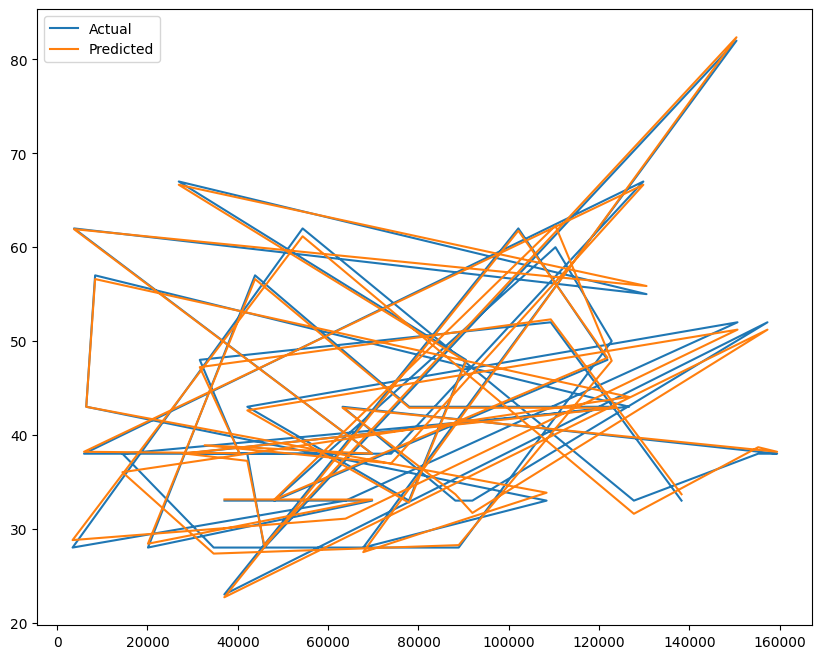

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : predicted})
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [ ]:
# Đánh giá các mô hình hồi quy
# import pandas as pd
import pandas as pd

# List1
lst = [R2,MAPE,MAE,RMSE,acc]

d = pd.DataFrame({"R2":R2,"MAPE":MAPE,"MAE":MAE,"RMSE":RMSE,"acc":acc},index=["Linear regression","Ridge regression","Lasso regression","Random Forest Regressor","Gradient Boosting Regressor"])

In [ ]:
import plotly.express as px
fig = px.bar(data_frame=d, y=d.index, x=["R2","MAPE","MAE","RMSE","acc"], text_auto='0.2s',
            title="Regression models")
fig.update_traces(textfont_size=12, textangle=0,textposition="auto", cliponaxis=False)
fig.show(renderer="colab")

Dựa trên kết quả, Gradient Boosting Regressor và Random Forest Regressor là mô hình hồi quy tốt nhất cho thử thách này

**Classification models**
1. K Nearest Neighbours
2. Decision Tree
3. Naive Bayes
4. Random Forest Classifier
5. Logistic Regression
6. Support Vector Machine

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from tabulate import tabulate
#ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


df_copy = pd.read_csv("/content/E-ShopClothingEDA2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
encoders = {}
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df_copy[col] = label_encoder.fit_transform(df_copy[col])
            encoders[col] = label_encoder
df_copy["price 2"] = df_copy["price 2"] - 1

y = df_copy["price 2"]
X = df_copy.drop("price 2",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accurac=[]
precision=[]
recall=[]

Xác thực chéo và Điều chỉnh siêu tham số (GridSearch)

Chúng tôi sẽ sử dụng xác thực K-Fold Cross --> Đảm bảo rằng mọi quan sát từ tập dữ liệu gốc đều có cơ hội xuất hiện trong tập huấn luyện và tập kiểm tra.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

In [ ]:
# 1. K-Nearest Neighbour
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train[:1000], y_train[:1000])

KNN_train, KNN_test = KNN_model.score(X_train, y_train), KNN_model.score(X_test, y_test)
KNN_predict = KNN_model.predict(X_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9256360669607784
Test Score: 0.927738329052727


In [ ]:
KNN_predict = KNN_model.predict(X_test)
accurac.append(accuracy_score(KNN_predict, y_test))
precision.append(precision_score(KNN_predict, y_test))
recall.append(recall_score(KNN_predict, y_test))

print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     67836
           1       0.96      0.89      0.92     64544

    accuracy                           0.93    132380
   macro avg       0.93      0.93      0.93    132380
weighted avg       0.93      0.93      0.93    132380



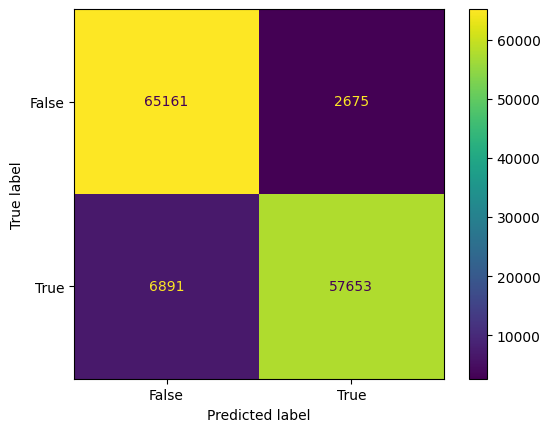

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicted = KNN_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# 2. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np


df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier,
                     param_grid=params_DT,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

gs_DT.fit(X_train, y_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=DecisionTreeClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [ ]:
best_parameters = gs_DT.best_params_
print ( f"giá trị tối ưu :{best_parameters}")

giá trị tối ưu :{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [ ]:
# Nhập thư viện scikit-learn
from sklearn.tree import DecisionTreeRegressor

# Xác định giá trị cho best_max_depth
best_max_depth = 5  # Điều chỉnh giá trị này theo nhu cầu của bạn

# Sau đó, bạn có thể sử dụng best_max_depth trong khai báo cây quyết định
clf = DecisionTreeRegressor(max_depth=best_max_depth)
clf.fit(X_train, y_train)


# Huấn luyện mô hình trên tập huấn luyện (X_train là dữ liệu đầu vào, y_train là dữ liệu đầu ra)
clf.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

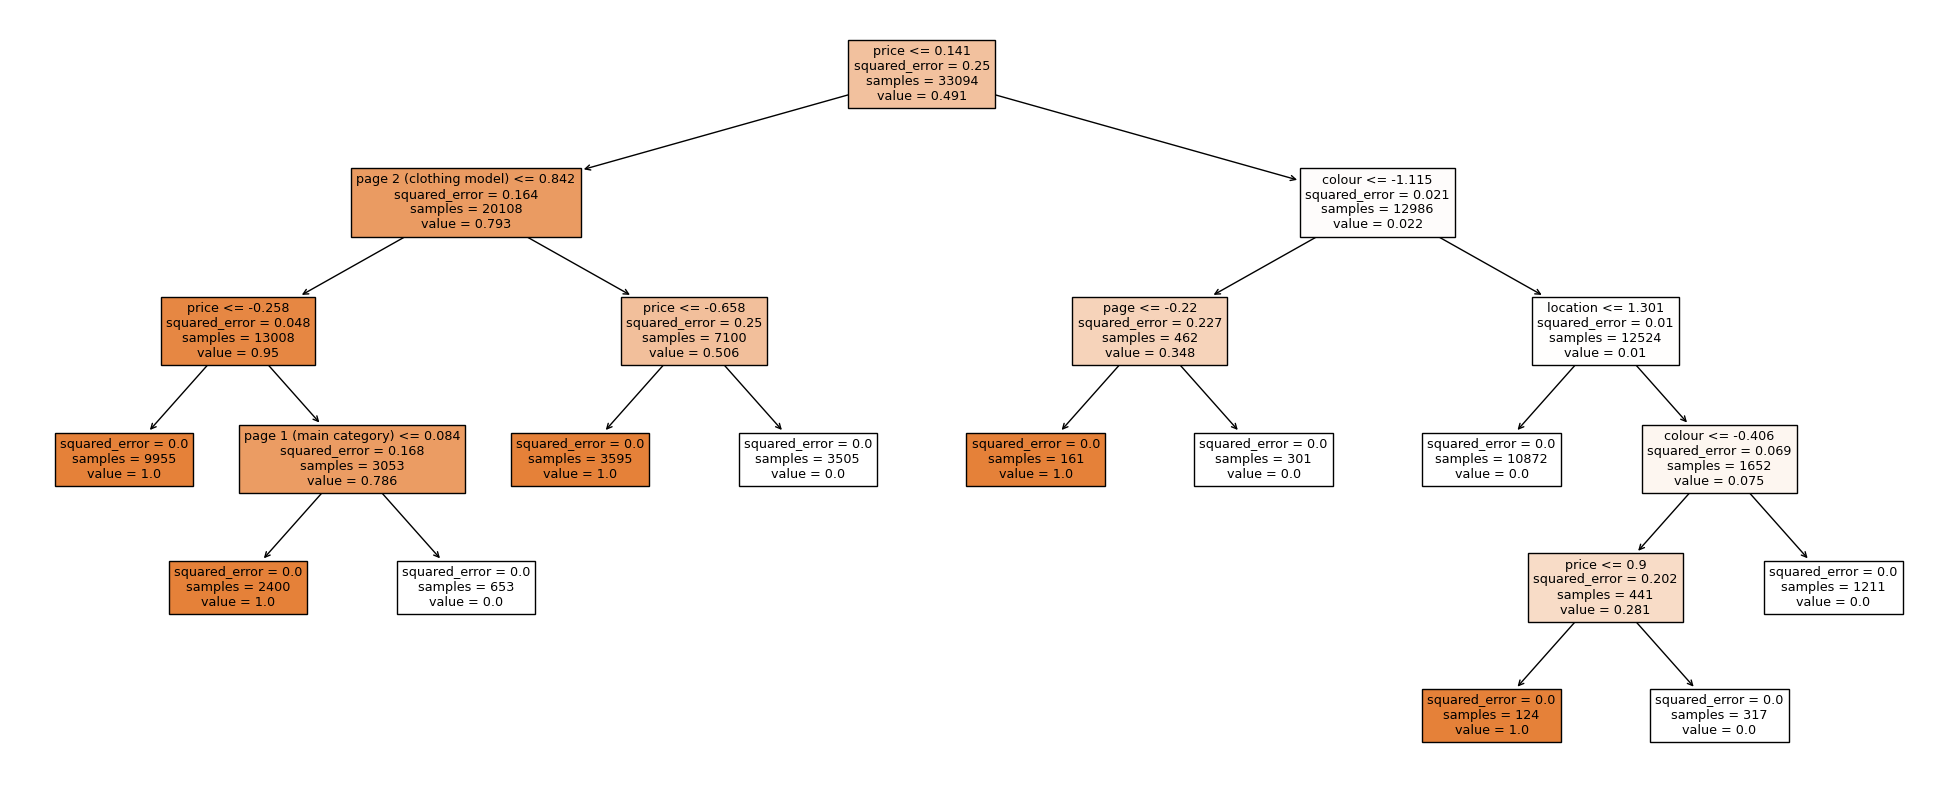

In [ ]:
# Nhập các thư viện cần thiết
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree  # Đảm bảo bạn đã import plot_tree từ sklearn.tree

# Tạo hình ảnh với kích thước cụ thể
fig, ax = plt.subplots(figsize=(25, 10))

# Vẽ cây quyết định và điền màu vào các nút
plot_tree(clf, filled=True, feature_names=X.columns, ax=ax)

# Lưu hình ảnh với tên tệp và định dạng ảnh mong muốn (ví dụ: PNG)
plt.savefig("decision_tree.png")

# Hiển thị hình ảnh (nếu bạn muốn xem nó trên cửa sổ hiện tại)
plt.show()


In [ ]:
gs_DT.best_score_

1.0

In [ ]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

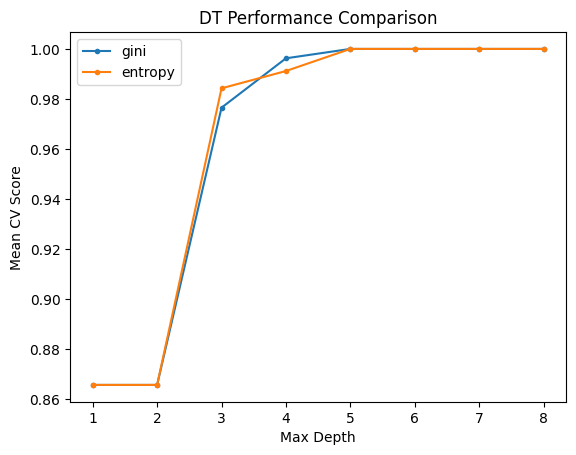

In [ ]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)


plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()


predicted=gs_DT.predict(X_test)
accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67836
           1       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



In [ ]:
# 3. Naive Bayes
from sklearn.naive_bayes import GaussianNB
np.random.seed(999)
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid=params_NB,cv=cv_method,verbose=1,scoring='accuracy')
gs_NB.fit(X_train, y_train)
predicted=gs_NB.predict(X_test)
accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     67836
           1       0.88      0.97      0.93     64544

    accuracy                           0.92    132380
   macro avg       0.93      0.93      0.92    132380
weighted avg       0.93      0.92      0.92    132380



In [ ]:
# 4. Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# Tạo lưới tham số dựa trên kết quả tìm kiếm ngẫu nhiên
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,5,6,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [20,30]
}
# Tạo mô hình dựa trên
rf = RandomForestClassifier(random_state=10)

# Khởi tạo mô hình tìm kiếm lưới
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = cv_method , n_jobs = -1, verbose = 2)


# Điều chỉnh tìm kiếm dạng lưới cho phù hợp với dữ liệu
grid_search.fit(X_train, y_train);


Fitting 15 folds for each of 24 candidates, totalling 360 fits


**max_depth 4**

- [CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=20; total time=   0.3s
- [CV] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=30; total time=   0.5s
- [CV] END bootstrap=True, max_depth=4, max_features=sqrt, n_estimators=20; total time=   0.3s
- [CV] END bootstrap=True, max_depth=4, max_features=sqrt, n_estimators=30; total time=   0.5s
- [CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=4, max_features=log2, n_estimators=30; total time=   0.5s

**max_depth 5**

- [CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=30; total time=   0.5s
- [CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=30; total time=   0.6s
- [CV] END bootstrap=True, max_depth=5, max_features=log2, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=5, max_features=log2, n_estimators=30; total time=   0.6s

**max_depth 6**

- [CV] END bootstrap=True, max_depth=6, max_features=auto, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=6, max_features=auto, n_estimators=30; total time=   0.6s
- [CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=20; total time=   0.5s
- [CV] END bootstrap=True, max_depth=6, max_features=sqrt, n_estimators=30; total time=   0.6s
- [CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=6, max_features=log2, n_estimators=30; total time=   0.6s

**max_depth 10**

- [CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=30; total time=   0.6s
- [CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=30; total time=   0.6s
- [CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=20; total time=   0.4s
- [CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=30; total time=   0.6s



In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 20}

In [ ]:
best_grid = grid_search.best_estimator_
predicted=grid_search.predict(X_test)
print(accuracy_score(predicted, y_test))

accurac.append(accuracy_score(predicted, y_test))
precision.append(precision_score(predicted, y_test))
recall.append(recall_score(predicted, y_test))

1.0


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67836
           1       1.00      1.00      1.00     64544

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380



In [ ]:
# 5. Logistic Regression
df_copy = pd.read_csv("/content/E-ShopClothingEDA2008.csv")
df_copy=df_copy.drop(['session ID','year'],axis=1)

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['page 2 (clothing model)']
for x in clm:
    df_copy[x]=le.fit_transform(df_copy[x])


y = df_copy["price 2"]
X = df_copy.drop("price 2",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score( lr_predict,y_test)
print("\n")
print("Độ chính xác của hồi quy logistic:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))



Độ chính xác của hồi quy logistic: 99.82474618412874 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [ ]:
accurac.append(accuracy_score(lr_predict, y_test))
precision.append(precision_score(lr_predict, y_test))
recall.append(recall_score(lr_predict, y_test))

In [ ]:
# 6. SVM
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

svc_acc_score = accuracy_score(y_test, svc_predicted)
print("\n")
print(" Độ chính xác của bộ phân loại vectơ hỗ trợ:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))



 Độ chính xác của bộ phân loại vectơ hỗ trợ: 99.99136680709994 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59384
           2       1.00      1.00      1.00     56448

    accuracy                           1.00    115832
   macro avg       1.00      1.00      1.00    115832
weighted avg       1.00      1.00      1.00    115832



In [ ]:
accurac.append(accuracy_score(svc_predicted, y_test))
precision.append(precision_score(svc_predicted, y_test))
recall.append(recall_score(svc_predicted, y_test))

In [ ]:
# Đánh giá cho các mô hình phân loại
# import pandas as pd
import pandas as pd
# List1
lst = [accurac,precision,recall]
d = pd.DataFrame({"accuracy":accurac,"preision":precision,"recall":recall},
                 index=["K Nearest Neighbours","Decision Tree","Naive Bayes",
                        "Random Forest Classifier","Logistic Regression","Support Vector Machine"])
d

,accuracy,preision,recall
K Nearest Neighbours,0.927738,0.893236,0.955659
Decision Tree,1.000000,1.000000,1.000000
Naive Bayes,0.923931,0.974544,0.881856
Random Forest Classifier,1.000000,1.000000,1.000000
Logistic Regression,0.998247,0.996582,1.000000
Support Vector Machine,0.999914,0.999882,0.999949


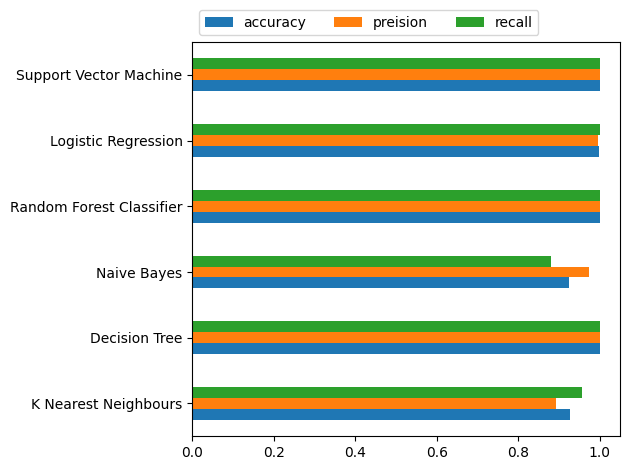

In [ ]:
ax = d.plot.barh()
ax.legend(
    ncol=6,
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 10}
)
plt.tight_layout()

In [ ]:
# Dựa trên kết quả, K Nearest Neighbours là mô hình phân loại tốt nhất cho thử thách này và đây là báo cáo phân loại cho chế độ này:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train[:1000], y_train[:1000])

KNN_train, KNN_test = KNN_model.score(X_train, y_train), KNN_model.score(X_test, y_test)
KNN_predict = KNN_model.predict(X_test)

print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94     59384
           2       0.97      0.90      0.93     56448

    accuracy                           0.94    115832
   macro avg       0.94      0.93      0.94    115832
weighted avg       0.94      0.94      0.94    115832



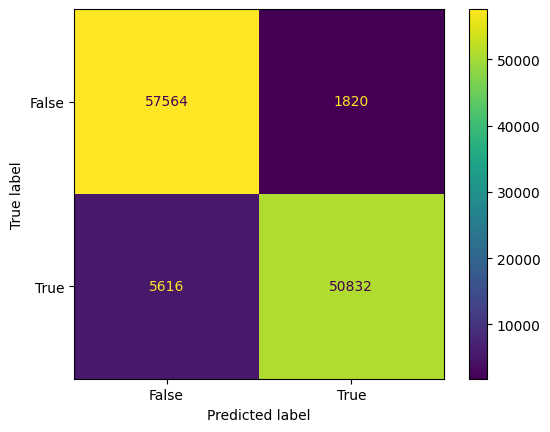

In [ ]:
# Và ma trận nhầm lẫn là
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predicted = KNN_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
